In [129]:
#Import dependencies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import numpy as np #very efficient array and linear algebra functions
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns

from scipy.stats import norm
from sklearn.linear_model import LinearRegression #Scikit-learn machine learning library for Python
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

## Read the CSV and Perform Basic Data Cleaning

### Target variable is starting salary.  Goal of multiple linear regression model is to predict a person's starting salary based on school type and location

Potential Features = X = School Name, School Type, Mid-Career Median Salary, Mid-Career 10th Percentile Salary, Mid-Career 25th Percentil Salary, Mid-Career 75th Percentile Salary, Mid-Career 90th Percentile Salary

Value to Predict = Y = Starting Median Salary

In [76]:
#Load the CSV file as a Pandas DataFrame and preview the DataFrame
df = pd.read_csv("salaries-by-college-type.csv")
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [77]:
#Load the CSV file as a Pandas DataFrame and preview the DataFrame
region_df = pd.read_csv("salaries-by-region.csv")
region_df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


# Cleaning Data

In [78]:
#Remove the fields from the data set that we don't want to include in our model

del df['Mid-Career Median Salary']
del df['Mid-Career 10th Percentile Salary']
del df['Mid-Career 25th Percentile Salary']
del df['Mid-Career 75th Percentile Salary']
del df['Mid-Career 90th Percentile Salary']

In [79]:
df.head()

,School Name,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00"
2,Harvey Mudd College,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00"
4,Cooper Union,Engineering,"$62,200.00"


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   School Name             269 non-null    object
 1   School Type             269 non-null    object
 2   Starting Median Salary  269 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [81]:
df['Starting Median Salary']=(df['Starting Median Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [82]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   School Name             269 non-null    object 
 1   School Type             269 non-null    object 
 2   Starting Median Salary  269 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [83]:
#Remove the fields from the data set that we don't want to include in our model

del region_df['Mid-Career Median Salary']
del region_df['Mid-Career 10th Percentile Salary']
del region_df['Mid-Career 25th Percentile Salary']
del region_df['Mid-Career 75th Percentile Salary']
del region_df['Mid-Career 90th Percentile Salary']

In [84]:
region_df.head()

,School Name,Region,Starting Median Salary
0,Stanford University,California,"$70,400.00"
1,California Institute of Technology (CIT),California,"$75,500.00"
2,Harvey Mudd College,California,"$71,800.00"
3,"University of California, Berkeley",California,"$59,900.00"
4,Occidental College,California,"$51,900.00"


In [85]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   School Name             320 non-null    object
 1   Region                  320 non-null    object
 2   Starting Median Salary  320 non-null    object
dtypes: object(3)
memory usage: 7.6+ KB


In [86]:
region_df['Starting Median Salary']=(region_df['Starting Median Salary'].replace( '[\$,)]','', regex=True )
                   .replace( '[(]','-',   regex=True ).astype(float))

In [87]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   School Name             320 non-null    object 
 1   Region                  320 non-null    object 
 2   Starting Median Salary  320 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.6+ KB


# Join tables

In [88]:
joined_df = pd.merge(df, region_df, on=["School Name", "School Name"])
joined_df

,School Name,School Type,Starting Median Salary_x,Region,Starting Median Salary_y
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,Northeastern,72200.0
1,California Institute of Technology (CIT),Engineering,75500.0,California,75500.0
2,Harvey Mudd College,Engineering,71800.0,California,71800.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,Northeastern,62400.0
4,Cooper Union,Engineering,62200.0,Northeastern,62200.0
...,...,...,...,...,...
263,Austin Peay State University,State,37700.0,Southern,37700.0
264,Pittsburg State University,State,40400.0,Midwestern,40400.0
265,Southern Utah University,State,41900.0,Western,41900.0
266,Montana State University - Billings,State,37900.0,Western,37900.0


In [89]:
joined_df.describe()

,Starting Median Salary_x,Starting Median Salary_y
count,268.000000,268.000000
mean,46043.656716,46043.656716
std,6411.734098,6411.734098
min,34800.000000,34800.000000
25%,42000.000000,42000.000000
50%,44700.000000,44700.000000
75%,48150.000000,48150.000000
max,75500.000000,75500.000000


In [90]:
joined_copy_df=joined_df.copy()
joined_copy_df

,School Name,School Type,Starting Median Salary_x,Region,Starting Median Salary_y
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,Northeastern,72200.0
1,California Institute of Technology (CIT),Engineering,75500.0,California,75500.0
2,Harvey Mudd College,Engineering,71800.0,California,71800.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,Northeastern,62400.0
4,Cooper Union,Engineering,62200.0,Northeastern,62200.0
...,...,...,...,...,...
263,Austin Peay State University,State,37700.0,Southern,37700.0
264,Pittsburg State University,State,40400.0,Midwestern,40400.0
265,Southern Utah University,State,41900.0,Western,41900.0
266,Montana State University - Billings,State,37900.0,Western,37900.0


In [93]:
#Remove the fields from the data set that we don't want to include in our model
del joined_copy_df['School Name']
del joined_copy_df['Starting Median Salary_x']

In [94]:
joined_copy_df

,School Type,Region,Starting Median Salary_y
0,Engineering,Northeastern,72200.0
1,Engineering,California,75500.0
2,Engineering,California,71800.0
3,Engineering,Northeastern,62400.0
4,Engineering,Northeastern,62200.0
...,...,...,...
263,State,Southern,37700.0
264,State,Midwestern,40400.0
265,State,Western,41900.0
266,State,Western,37900.0


In [107]:
joined_copy_df.rename(columns = {'Starting Median Salary_y':'Salary'}, inplace=True)
joined_copy_df.rename(columns = {'School Type':'Type'}, inplace=True)

In [108]:
joined_copy_df

,Type,Region,Salary
0,Engineering,Northeastern,72200.0
1,Engineering,California,75500.0
2,Engineering,California,71800.0
3,Engineering,Northeastern,62400.0
4,Engineering,Northeastern,62200.0
...,...,...,...
263,State,Southern,37700.0
264,State,Midwestern,40400.0
265,State,Western,41900.0
266,State,Western,37900.0


### Next we visualize each categorical feature to see which features could be good predictors of salary. We use the violin plot here to see the shape of the distribution curve along with mean and interquartile ranges.

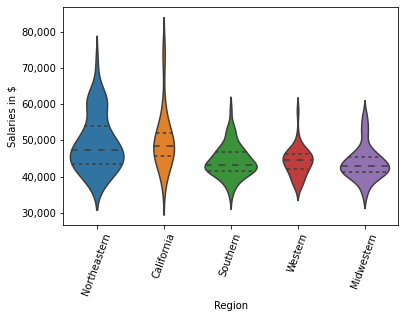

In [111]:
sns.violinplot(x = joined_copy_df.Region, y = joined_copy_df['Salary'], data = joined_copy_df, scale = 'count', inner = 'quartile')
plt.xticks(rotation = 70)
plt.ylabel('Salaries in $')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### We can see that the California region had the highest salary, followed closely by the Northeastern region. Distributions appear normal.

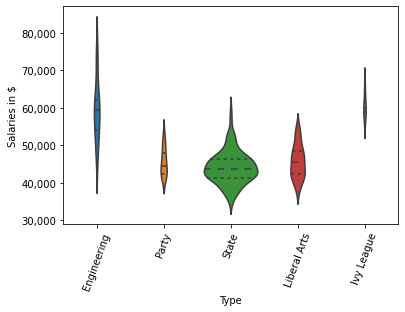

In [112]:
sns.violinplot(x = joined_copy_df.Type, y = joined_copy_df['Salary'], data = joined_copy_df, scale = 'count', inner = 'quartile')
plt.xticks(rotation = 70)
plt.ylabel('Salaries in $')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### We can see that Ivy League and Engineering are the highest starting salary school types.  Distribution seems normal.

In [113]:
## One-hot encode categorical data in clean_train_df dataset
joined_copy_df = pd.get_dummies(joined_copy_df)

In [114]:
joined_copy_df

,Salary,Type_Engineering,Type_Ivy League,Type_Liberal Arts,Type_Party,Type_State,Region_California,Region_Midwestern,Region_Northeastern,Region_Southern,Region_Western
0,72200.0,1,0,0,0,0,0,0,1,0,0
1,75500.0,1,0,0,0,0,1,0,0,0,0
2,71800.0,1,0,0,0,0,1,0,0,0,0
3,62400.0,1,0,0,0,0,0,0,1,0,0
4,62200.0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
263,37700.0,0,0,0,0,1,0,0,0,1,0
264,40400.0,0,0,0,0,1,0,1,0,0,0
265,41900.0,0,0,0,0,1,0,0,0,0,1
266,37900.0,0,0,0,0,1,0,0,0,0,1


### Correlation between all the features

#### Now that numerical values are assigned to all features we can see the correlation between all of them.

<AxesSubplot:>

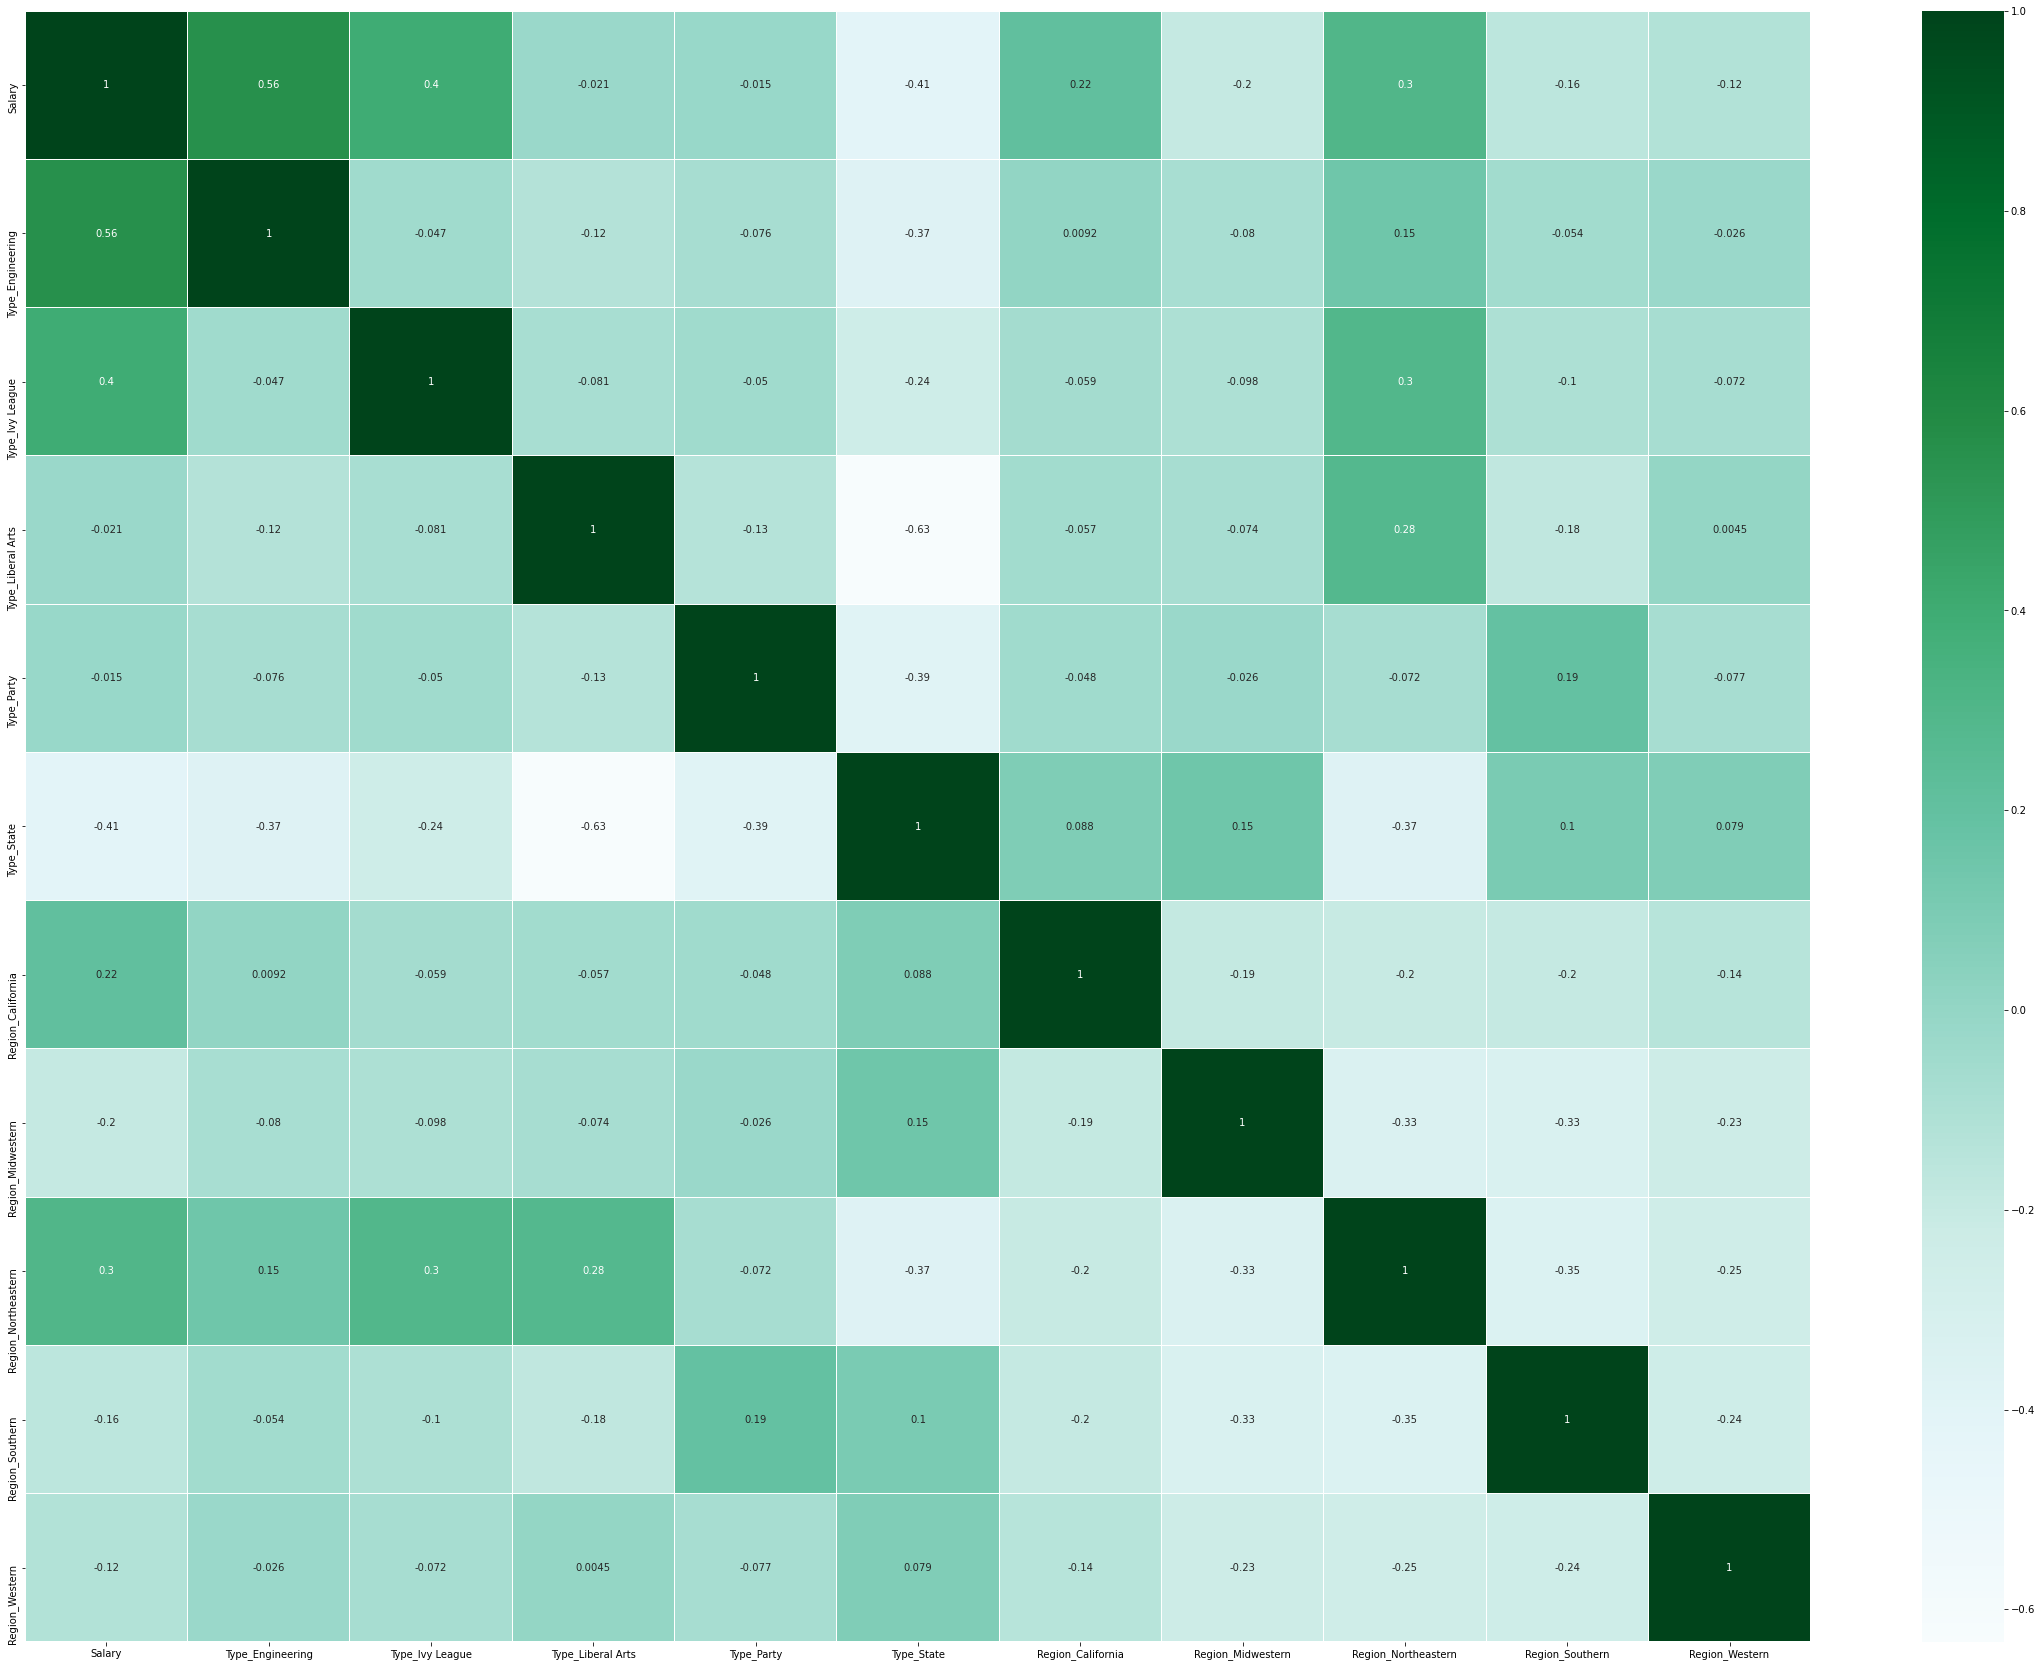

In [115]:
# Plot heatmap of all data with correlation coefficients visible
joined_copy_df_corr = joined_copy_df.corr()
plt.subplots(figsize=(40,30))
sns.heatmap(joined_copy_df_corr, cmap = 'BuGn', linewidth =.005, annot = True)

#### INSERT CORRELATION INFORMATION

#### To create a basic training model, two variables will be assigned for the model to use. Twenty percent of the training data will be split into testing data that we can use to test the model with data for which the salaries are already known.

In [116]:
#Split the data and assign 'salary' to 'sal_df' and the rest of the features to 'feat_df'. 
feat_df = joined_copy_df[joined_copy_df.loc[ :, joined_copy_df.columns != 'Salary'].columns]
sal_df = joined_copy_df['Salary']
feat_train, feat_test, sal_train, sal_test = train_test_split(feat_df, sal_df, test_size = 0.2, random_state = 1)

In [117]:
#View inputs and outputs of training model
feat_train.head()

,Type_Engineering,Type_Ivy League,Type_Liberal Arts,Type_Party,Type_State,Region_California,Region_Midwestern,Region_Northeastern,Region_Southern,Region_Western
18,0,0,0,1,0,0,1,0,0,0
73,0,0,1,0,0,0,0,1,0,0
180,0,0,0,0,1,0,0,0,1,0
252,0,0,0,0,1,0,1,0,0,0
140,0,0,0,0,1,0,0,1,0,0


In [118]:
sal_train.head()

18     52900.0
73     47200.0
180    44500.0
252    38900.0
140    43900.0
Name: Salary, dtype: float64

#### We will use linear regression here as salary is a continious variable. With all the data, we see that this is a case of Supervised Regression learning. We will establish the baseline model by appling Linear Regression to feat_train, sal_train

In [119]:
#Create Linear Regression Object and fit the model
reg = LinearRegression()
reg.fit(feat_train,sal_train)
reg

LinearRegression()

#### Next, we will view the coefficients of our model -

In [120]:
#View coeff of Linear Regression object 
print(reg.intercept_)
print(reg.coef_)

-7.991850944928823e+17
[1.82224276e+17 1.82224276e+17 1.82224276e+17 1.82224276e+17
 1.82224276e+17 6.16960818e+17 6.16960818e+17 6.16960818e+17
 6.16960818e+17 6.16960818e+17]


In [121]:
#predict salary using training data
ypred = reg.predict(feat_train)

#View first five predictions -
print ('First five predictions:' , ypred[0:5])

First five predictions: [45312. 46592. 43136. 43136. 44800.]


In [122]:
#print MSE - 
print ('Mean Squared Error of our prediction model', mean_squared_error(sal_train, ypred))

Mean Squared Error of our prediction model 18556839.028037384


In [15]:
#Remove the target from features data
X = df.drop(columns=["Starting_Median_Salary"]).values
y = df.Starting_Median_Salary.values

In [125]:
# accurace of the baseline model using 5-cross validation method -
score = cross_val_score(reg, feat_train, sal_train, cv = 5)
print ('5-Cross Validation accuracy', (np.mean(score)), (np.std(score)))

5-Cross Validation accuracy 0.49880374275058453 0.13815231446486412


In [131]:
#distribution plots 
def dis_data(Rfunction, Bfunction, Rname, Bname, title):
    plt.figure(figsize=(10,6))
    ax1 = sns.distplot(Rfunction, hist = False, color = 'r', label = Rname)
    ax1 = sns.distplot(Bfunction, hist = False, color = 'b', label = Bname)
    plt.title(title)
    plt.show()
    plt.close()

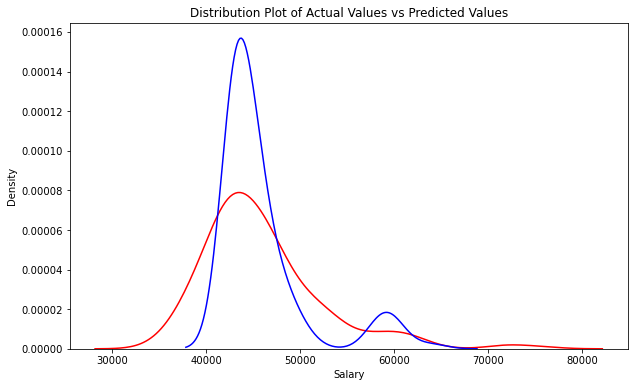

In [133]:
#distribution plot 
#Calling the function
Title = 'Distribution Plot of Actual Values vs Predicted Values'
dis_data(sal_train, ypred, 'Actual Values(train data)', 'Predicted Values(train data)', Title)

In [134]:
#store test set predictions in yhat_test 
ypred_test = reg.predict(feat_test)

#view first five predictions - 
print ('First five predictions(test data)', ypred_test[0:5])

First five predictions(test data) [60032. 45312. 42752. 42752. 43136.]


In [135]:
#MSE of test data - 
print ('Mean Squared Error of test data ', mean_squared_error(sal_test, ypred_test))

Mean Squared Error of test data  12961199.111111112


In [136]:
#accuracy of test data using 5-cross validation method - 
score = cross_val_score(reg, feat_test, sal_test, cv = 5)
print ('5-cross validation accuracy(test data)', (np.mean(score)), (np.std(score)))

5-cross validation accuracy(test data) 0.29752240225822324 0.3637386305354092


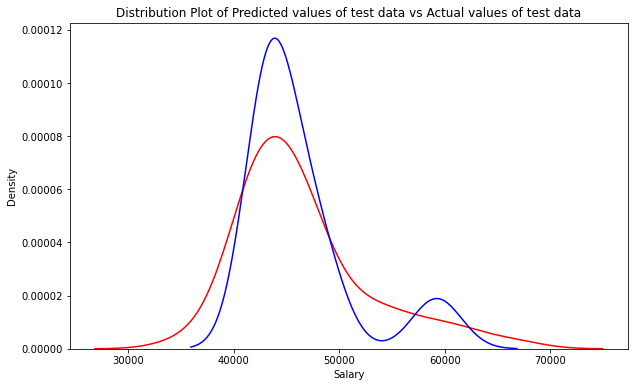

In [137]:
#Distribution plot 
Title = 'Distribution Plot of Predicted values of test data vs Actual values of test data'
dis_data(sal_test, ypred_test, 'Actual Values(test)', 'Predicted Values(test)', title = Title)

In [16]:
df.Starting_Median_Salary.dtype

dtype('float64')

In [17]:
#df.head().copy().assign(rand=lambda x: x.Starting_Median_Salary*2).drop(columns=["Starting_Median_Salary"]).values

In [18]:
df.columns

Index(['Starting_Median_Salary', 'School Type_Engineering',
       'School Type_Ivy League', 'School Type_Liberal Arts',
       'School Type_Party', 'School Type_State'],
      dtype='object')

In [19]:
df.Starting_Median_Salary.values

array([72200., 75500., 71800., 62400., 62200., 61000., 61800., 61100.,
       58300., 58100., 60600., 56000., 53000., 53500., 55800., 51000.,
       48900., 52700., 46200., 52900., 52000., 50500., 49700., 44500.,
       47100., 46900., 44100., 49900., 47400., 46300., 44700., 42600.,
       41300., 41400., 41800., 43100., 43800., 42200., 42100., 54100.,
       52800., 54500., 53900., 48100., 50200., 51900., 53600., 49700.,
       46100., 47500., 51700., 48600., 46500., 47300., 47200., 48600.,
       46000., 47700., 42400., 49100., 41400., 45300., 46400., 44700.,
       45500., 44000., 49200., 42600., 42800., 42000., 43400., 46600.,
       38500., 40500., 44500., 43500., 42100., 41800., 39200., 42600.,
       41600., 42500., 38900., 42000., 41500., 39500., 58000., 66500.,
       59100., 63400., 60900., 60300., 56200., 59400., 59900., 52700.,
       57200., 52600., 51100., 52300., 47100., 48300., 52900., 49700.,
       53600., 57100., 53500., 52000., 50500., 49700., 52700., 49500.,
      

In [20]:
#Split into a training set and a test set
from sklearn.model_selection import train_test_split

#training set will be the larger portion of the data, typically 70% or more
#after the split will have four sets of data: x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#Create a StandardScalar instance
scaler = StandardScaler()

In [22]:
#Fit the StandardScaler
X_scaler= scaler.fit(X_train)

In [26]:
#Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
reg = LinearRegression()

In [41]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [44]:
encodeDictionary = {
    "School Type_Party": [[0,0,0,1,0]]
}

In [62]:
value = input("enter school type")

enter school typeSchool Type_Party


In [63]:
userInput = encodeDictionary[value]

In [64]:
userInputScaler = scaler.fit(userInput)

In [65]:
userInputScaled = userInputScaler.transform(userInput)

In [66]:
reg.predict(userInputScaled)

array([46095.74468085])

In [67]:
df.head(1)

,Starting_Median_Salary,School Type_Engineering,School Type_Ivy League,School Type_Liberal Arts,School Type_Party,School Type_State
0,72200.0,1.0,0.0,0.0,0.0,0.0


In [68]:
value

'School Type_Party'

In [69]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [70]:
y_pred=reg.predict(X_train_scaled)
print(y_pred.shape)

(188,)


In [71]:
y_pred_test=reg.predict(X_test_scaled)
print(y_pred_test)

[44098.31932773 44098.31932773 45677.77777778 44098.31932773
 44098.31932773 44098.31932773 44098.31932773 44098.31932773
 60884.61538462 60884.61538462 44098.31932773 44098.31932773
 44098.31932773 44098.31932773 44098.31932773 44098.31932773
 44098.31932773 44098.31932773 60660.         45677.77777778
 44098.31932773 44098.31932773 45677.77777778 45677.77777778
 44098.31932773 45677.77777778 44098.31932773 45677.77777778
 44098.31932773 44098.31932773 60884.61538462 44098.31932773
 44098.31932773 44098.31932773 45677.77777778 44098.31932773
 45677.77777778 44098.31932773 45273.33333333 44098.31932773
 44098.31932773 44098.31932773 45273.33333333 44098.31932773
 44098.31932773 45273.33333333 44098.31932773 44098.31932773
 44098.31932773 44098.31932773 44098.31932773 60884.61538462
 45273.33333333 44098.31932773 44098.31932773 60884.61538462
 44098.31932773 44098.31932773 44098.31932773 60660.
 44098.31932773 45677.77777778 44098.31932773 44098.31932773
 45677.77777778 44098.31932773 4

In [54]:
print(reg.coef_)

[ 3411.27142318  2127.25616251  -692.96041494  -586.79367855
 -1610.14174396]


In [55]:
print(reg.intercept_)

46095.744680851065


In [56]:
#Find the error rate on the training set (mean absolute error is the measure of the average prediction error across the data set)
mse = mean_absolute_error(y_train, reg.predict(X_train))
mse

4161.422924602541

In [57]:
#Find the error rate on the test set
msetest = mean_absolute_error(y_test, reg.predict(X_test))
msetest

3900.4149325078483

In [58]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_train,squared=False)

4553.663560453057

In [59]:
#test model after training by calling the predict method and giving it the x test variable as an arguement
reg.predict(X_test)


array([44485.60293689, 44485.60293689, 45402.78426591, 44485.60293689,
       44485.60293689, 44485.60293689, 44485.60293689, 44485.60293689,
       49507.01610403, 49507.01610403, 44485.60293689, 44485.60293689,
       44485.60293689, 44485.60293689, 44485.60293689, 44485.60293689,
       44485.60293689, 44485.60293689, 48223.00084336, 45402.78426591,
       44485.60293689, 44485.60293689, 45402.78426591, 45402.78426591,
       44485.60293689, 45402.78426591, 44485.60293689, 45402.78426591,
       44485.60293689, 44485.60293689, 49507.01610403, 44485.60293689,
       44485.60293689, 44485.60293689, 45402.78426591, 44485.60293689,
       45402.78426591, 44485.60293689, 45508.9510023 , 44485.60293689,
       44485.60293689, 44485.60293689, 45508.9510023 , 44485.60293689,
       44485.60293689, 45508.9510023 , 44485.60293689, 44485.60293689,
       44485.60293689, 44485.60293689, 44485.60293689, 49507.01610403,
       45508.9510023 , 44485.60293689, 44485.60293689, 49507.01610403,
      

In [ ]:
#Assess the performance of the model with results

#from sklearn.metrics import accuracy_score
#print(accuracy_score(y_test,y_pred))